In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [9]:
raw_df = pd.read_csv('data_breast.csv')
#колонка Unnamed: 32 полностью состоит из NaN - удаляем
raw_df = raw_df.drop('Unnamed: 32', 1)

In [10]:
raw_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
raw_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [13]:
#разделим датасет на 2 части, целевая переменная y и x - фичи
#из фичей удалим ID, т.к. для модели она нерелевантна
y = raw_df['diagnosis']
x = raw_df.drop(['id', 'diagnosis'], axis =1)

In [14]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

Имеем датасет, в котором нет пропущенных значений. Перейдём к изучению.

In [17]:
y.value_counts()
#в нашем датасете 357 доброкачественных примеров и 212 злокачественных

B    357
M    212
Name: diagnosis, dtype: int64

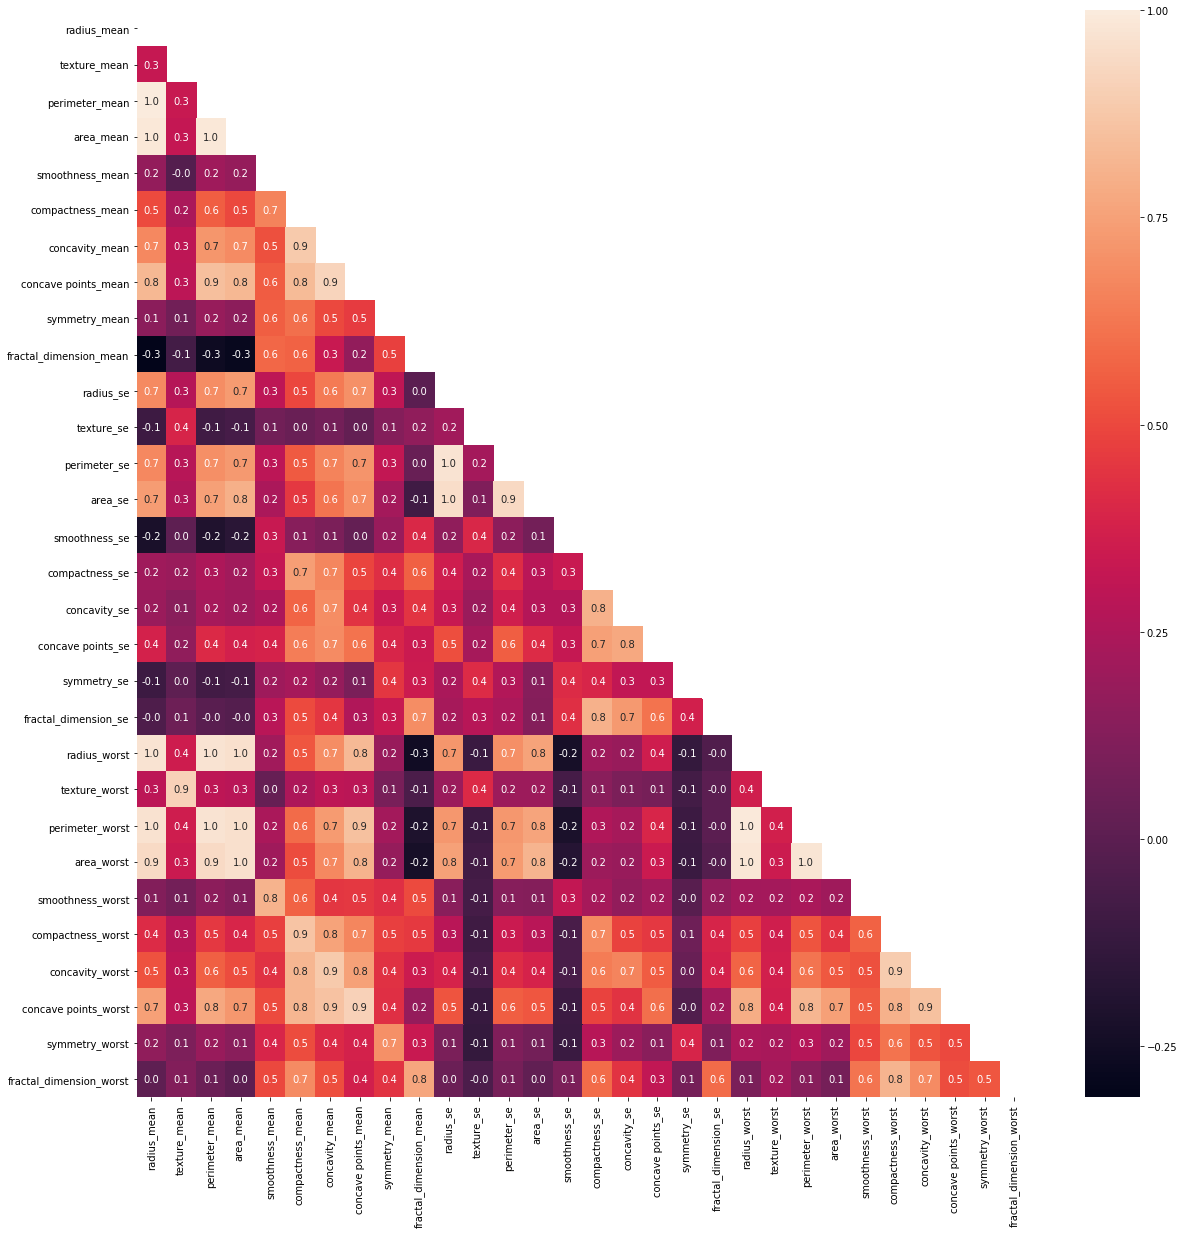

In [18]:
#посмотрим на корреляцию признаков
corr = x.corr()

plt.figure(figsize = (20,20))

mask = np.triu(np.ones((len(corr), len(corr))), k=0)

sns.heatmap(corr, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".1f"
           )

Однозначно видим, что некоторые признаки имеют максимальную корреляцию. Предположительно, можем избавиться от одной из переменных в каждой паре, но сначала давайте построим PairGrid, чтобы посмотреть на характер корреляции

In [34]:
feat_mean = ['perimeter_mean', 'area_mean', 'radius_mean', 'concavity_mean', 'compactness_mean', 'concave points_mean']
feat_se = ['perimeter_se', 'area_se', 'radius_se']
feat_worst = ['radius_worst','perimeter_worst','area_worst','perimeter_mean', 'radius_mean', 'area_mean']
feat_worst_mean = ['compactness_worst', 'concavity_worst','concave points_worst', 'compactness_mean', 'concavity_mean','concave points_mean']

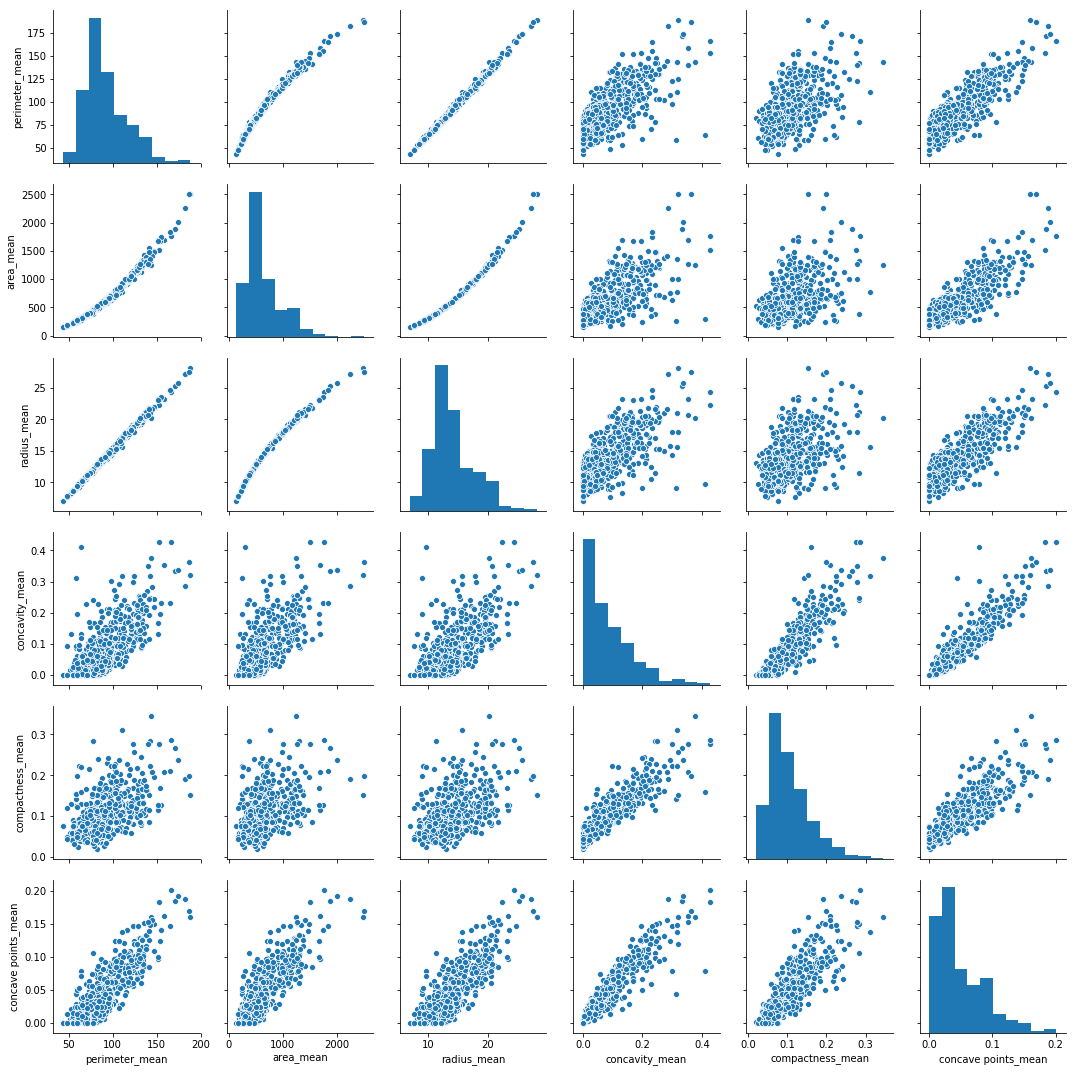

In [28]:
sns.pairplot(x[feat_mean])

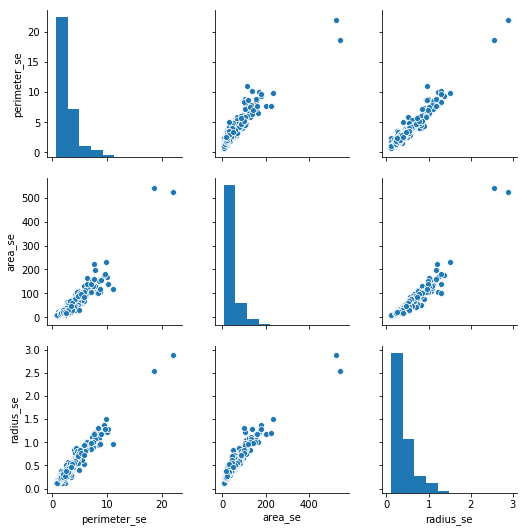

In [29]:
sns.pairplot(x[feat_se])

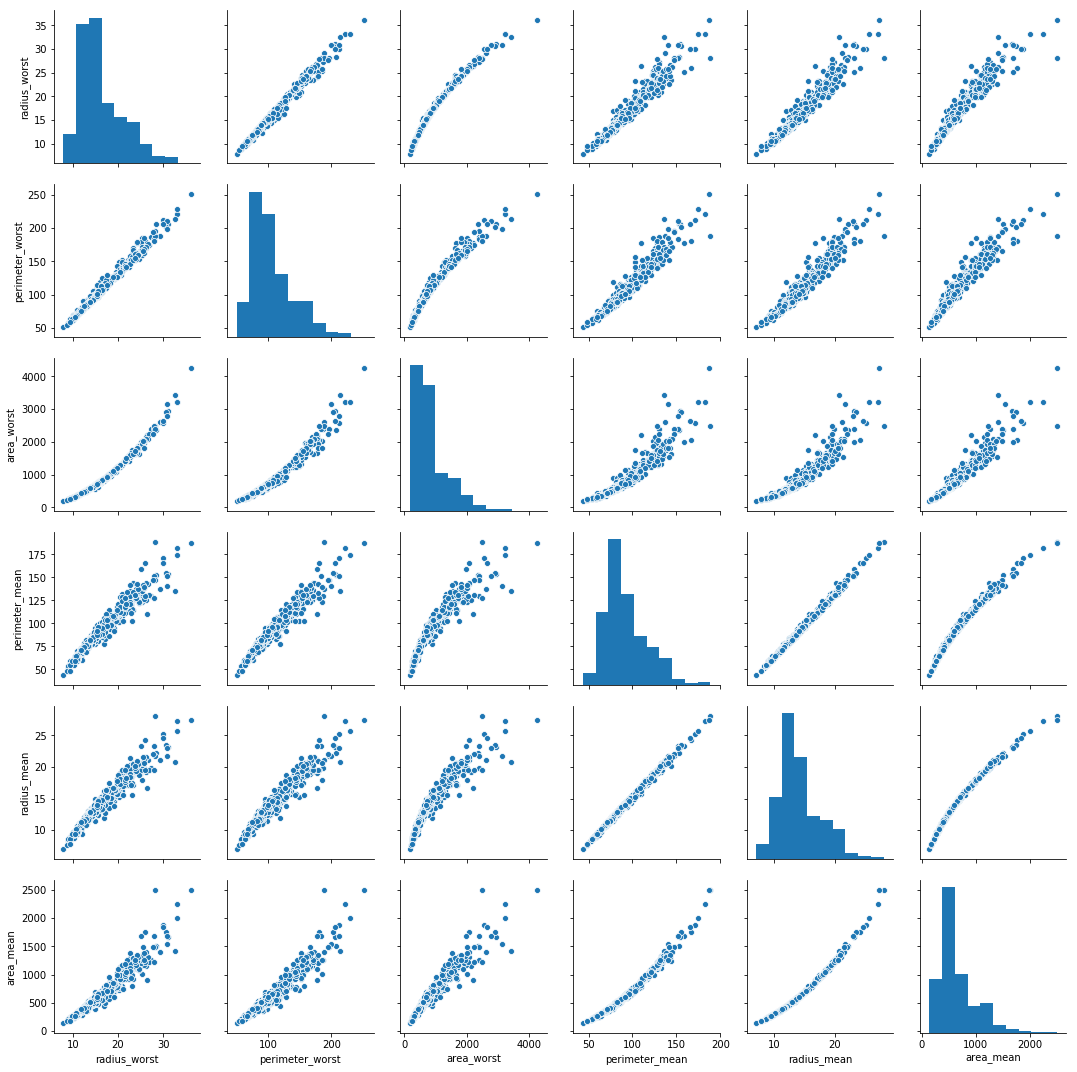

In [30]:
sns.pairplot(x[feat_worst])

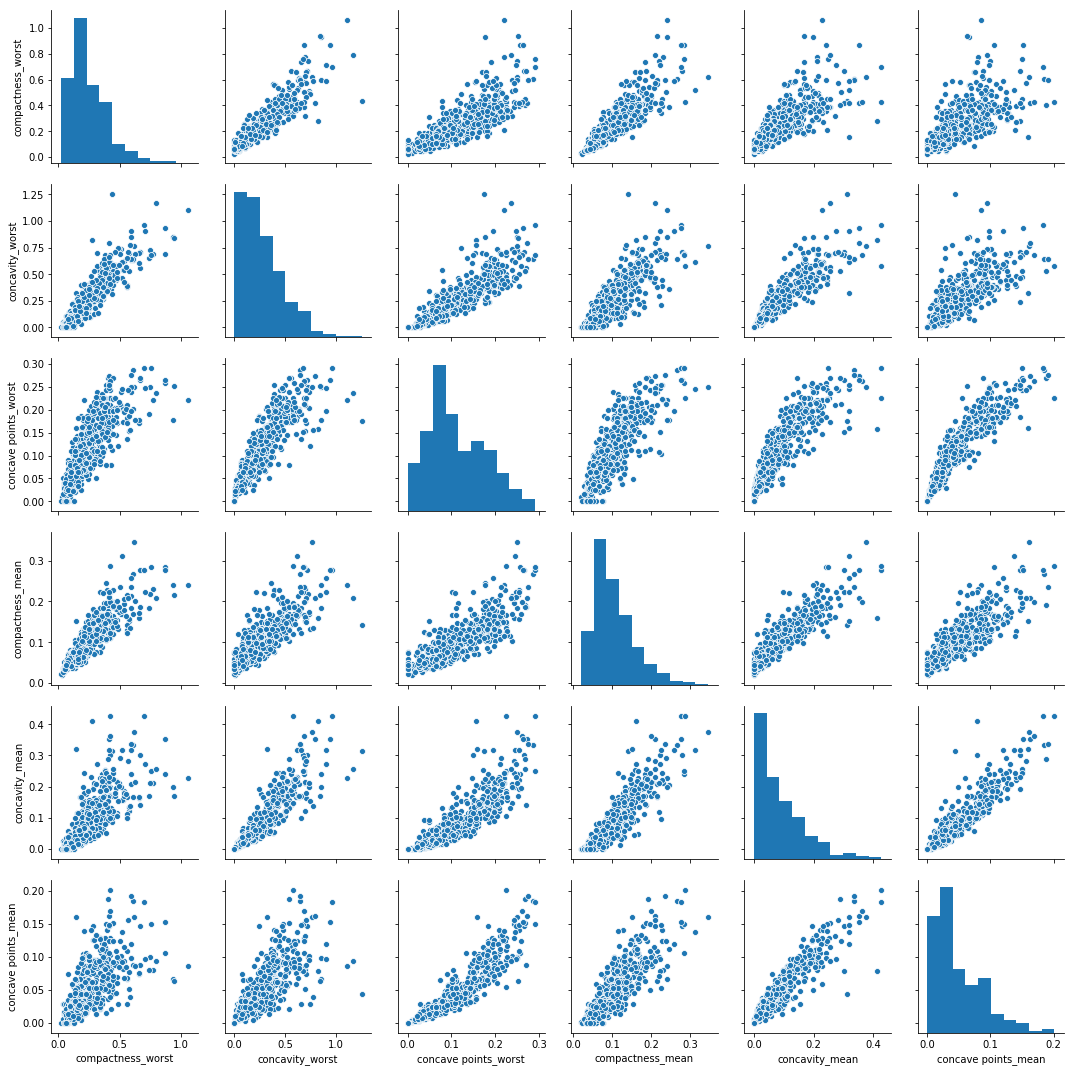

In [35]:
sns.pairplot(x[feat_worst_mean])

Составим список признаков, которые однозначно коррелируют с другими, и удалим их. Среди признаков радиус-площадь-периметр - оставим площадь.

При этом в силу того, что все признаки представляют собой ту или иную характеристику размерности, придумать какие-либо производные признаки проблематично.

In [36]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
              'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
              'compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


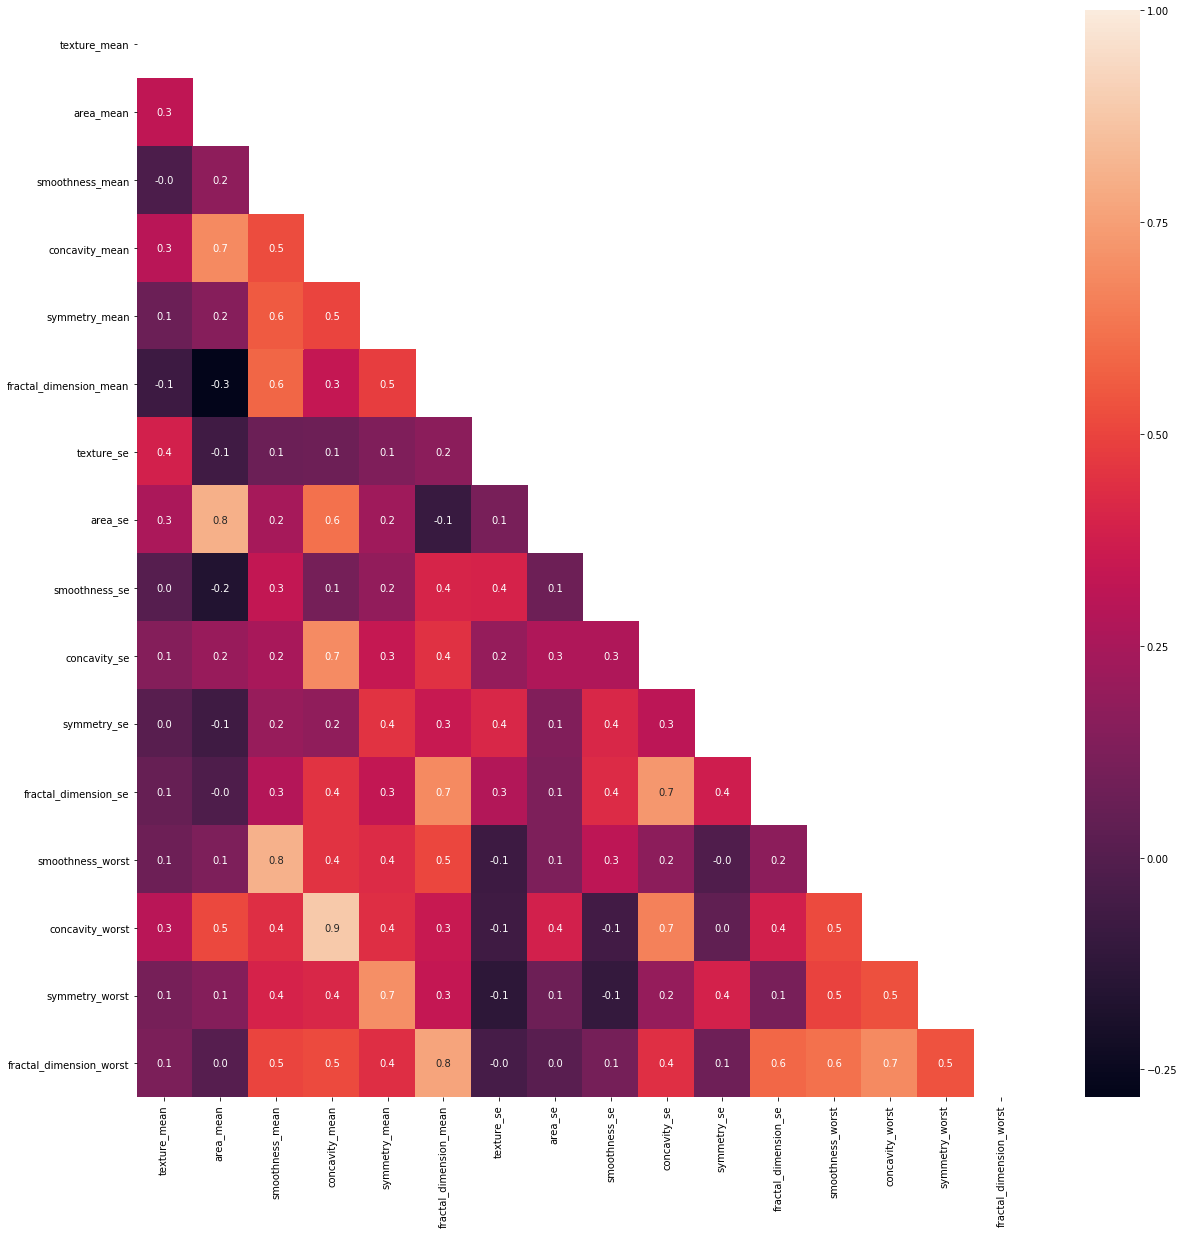

In [40]:
#построим новую тепловую карту признаков с корреляцией
corr = x_1.corr()

plt.figure(figsize = (20,20))

mask = np.triu(np.ones((len(corr), len(corr))), k=0)

sns.heatmap(corr, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".1f"
           )

Классификация методом RandomForest

Accuracy:  0.9532163742690059
Precision:  0.9531727978664993
Recall:  0.9532163742690059
F1_Score:  0.9530536907524804


C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


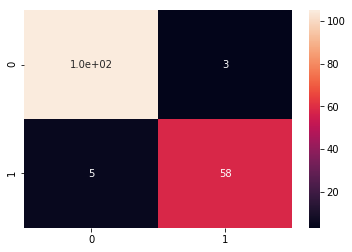

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

#поделим выборку на обучающую (70%) и тестовую (30%) 
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy: ',ac)
pr = precision_score(y_test,clf_rf.predict(x_test), average='weighted')
print('Precision: ',pr)
rec = recall_score(y_test,clf_rf.predict(x_test), average='weighted')
print('Recall: ',rec)
f = f1_score(y_test,clf_rf.predict(x_test), average='weighted')
print('F1_Score: ',f)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True)

Классификация методом Логистической регрессии

Accuracy:  0.9649122807017544
Precision:  0.9654113513100604
Recall:  0.9649122807017544
F1_Score:  0.9650224422036399


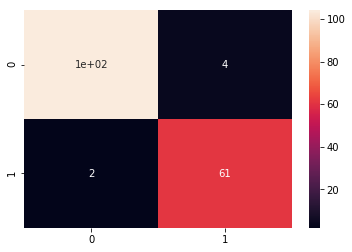

In [70]:
from sklearn.linear_model import LogisticRegression


clf_lr = LogisticRegression(solver='liblinear')      
clr_lr = clf_lr.fit(x_train,y_train)

ac = accuracy_score(y_test,clr_lr.predict(x_test))
print('Accuracy: ',ac)
pr = precision_score(y_test,clr_lr.predict(x_test), average='weighted')
print('Precision: ',pr)
rec = recall_score(y_test,clr_lr.predict(x_test), average='weighted')
print('Recall: ',rec)
f = f1_score(y_test,clr_lr.predict(x_test), average='weighted')
print('F1_Score: ',f)
cm = confusion_matrix(y_test,clr_lr.predict(x_test))
sns.heatmap(cm,annot=True)

Вероятности классов рассчитал ниже, однако хотелось бы, чтобы в итоговой работе проверялось то, о чём рассказывали на лекциях, а не то, что нагуглилось, т.к. хотелось бы понимания, что с этим можно сделать дальше

In [77]:
y_proba_rf = clf_rf.predict_proba(x_test)

In [78]:
y_proba_rf

array([[0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.4, 0.6],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0.1, 0.9],
       [0.9, 0.1],
       [1. , 0. ],
       [0.6, 0.4],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.2,

In [75]:
y_proba_lr = clf_lr.predict_proba(x_test)

In [76]:
y_proba_lr

array([[7.01106249e-01, 2.98893751e-01],
       [2.24260422e-03, 9.97757396e-01],
       [1.25940183e-01, 8.74059817e-01],
       [9.44408949e-01, 5.55910506e-02],
       [9.68517140e-01, 3.14828600e-02],
       [4.47426309e-04, 9.99552574e-01],
       [2.79450555e-05, 9.99972055e-01],
       [8.15610629e-02, 9.18438937e-01],
       [8.16296910e-01, 1.83703090e-01],
       [8.76432379e-01, 1.23567621e-01],
       [9.01154938e-01, 9.88450617e-02],
       [9.87552086e-02, 9.01244791e-01],
       [9.04180435e-01, 9.58195652e-02],
       [1.27147571e-01, 8.72852429e-01],
       [9.32652419e-01, 6.73475811e-02],
       [2.30300830e-01, 7.69699170e-01],
       [8.31185008e-01, 1.68814992e-01],
       [9.90335816e-01, 9.66418385e-03],
       [9.94233787e-01, 5.76621289e-03],
       [2.08298918e-03, 9.97917011e-01],
       [6.93583675e-01, 3.06416325e-01],
       [9.46845904e-01, 5.31540964e-02],
       [8.63784528e-04, 9.99136215e-01],
       [9.79402504e-01, 2.05974960e-02],
       [9.630626